## Simulación del Examen (Core)

### Fundamentos de Data Science – Práctica para el Examen

#### Contexto:

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

#### Requisitos:

1) Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

- Identificar y abordar cualquier valor duplicado.
- Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
- Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
- Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
- Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

2) Exploración de Datos:

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

- Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Diccionario de Datos:

 - user_id: Identificación única del usuario.
 - app_version: Versión de la aplicación usada.
 - platform: Plataforma del dispositivo (Android, iOS).
 - session_duration: Duración de la sesión en minutos.
 - number_of_sessions: Número de sesiones en un día.
 - country: País del usuario.
 - user_feedback: Puntuación de la experiencia del usuario (1-5).

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


1) Limpieza de Datos:

#### El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

- Identificar y abordar cualquier valor duplicado.
- Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
- Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
- Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
- Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

In [3]:
df = pd.read_csv('user_app_data.csv')
df.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [4]:
feedback_platform = df.groupby('platform')['user_feedback'].agg(['mean', 'std']).round(2)
feedback_platform

,mean,std
platform,,
Android,2.91,1.49
iOS,2.94,1.42


In [5]:
#Identificar y abordar cualquier valor duplicado.
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 0


In [6]:
#Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
print('Filas nulas:\n',df.isnull().sum())

Filas nulas:
 user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


In [7]:
#Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
df.dtypes

user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object

In [8]:
# #Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.

dtypes_dict = df.dtypes.to_dict() 

for column, dtype in dtypes_dict.items():
    if dtype == 'object':
        dtypes_dict[column] = 'string'
df = df.astype(dtypes_dict) 
print(df.dtypes)

user_id                        int64
app_version                  float64
platform              string[python]
session_duration               int64
number_of_sessions             int64
country               string[python]
user_feedback                  int64
dtype: object


In [9]:
# Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
Plataformas = df['platform'].unique()
print("Plataformas:", Plataformas)
paises = df['country'].unique()
print("paises:", paises)

Plataformas: <StringArray>
['Android', 'iOS']
Length: 2, dtype: string
paises: <StringArray>
['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain', 'Italy']
Length: 8, dtype: string


In [10]:
# Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).
df.describe()

,user_id,app_version,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1.155000,95.840000,9.596667,2.926667
std,86.746758,0.113363,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75.750000,1.100000,51.250000,5.000000,2.000000
50%,150.500000,1.200000,100.500000,9.000000,3.000000
75%,225.250000,1.300000,141.250000,15.000000,4.000000
max,300.000000,1.300000,179.000000,19.000000,5.000000


2) Exploración de Datos:

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

- Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [11]:
country_session_duration = df.groupby('country')['session_duration'].mean()
print(country_session_duration)

country
Canada      94.142857
France      93.108108
Germany    110.378378
Italy       88.055556
Mexico      92.333333
Spain       95.022222
UK          94.416667
USA         99.485714
Name: session_duration, dtype: float64


In [12]:
country_session_duration.sort_values()

country
Italy       88.055556
Mexico      92.333333
France      93.108108
Canada      94.142857
UK          94.416667
Spain       95.022222
USA         99.485714
Germany    110.378378
Name: session_duration, dtype: float64

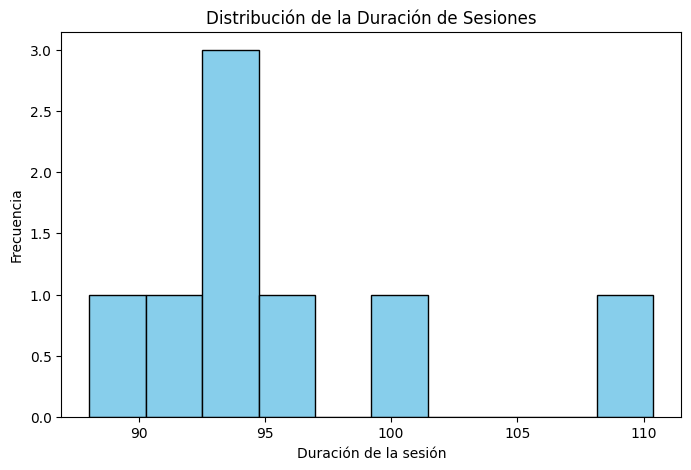

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(country_session_duration.values, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de la Duración de Sesiones')
plt.xlabel('Duración de la sesión')
plt.ylabel('Frecuencia')
plt.show()

### Este histograma sugiere que la mayoría de las sesiones tienen una duración cercana a los 95 minutos, con menor frecuencia en valores más bajos o más altos

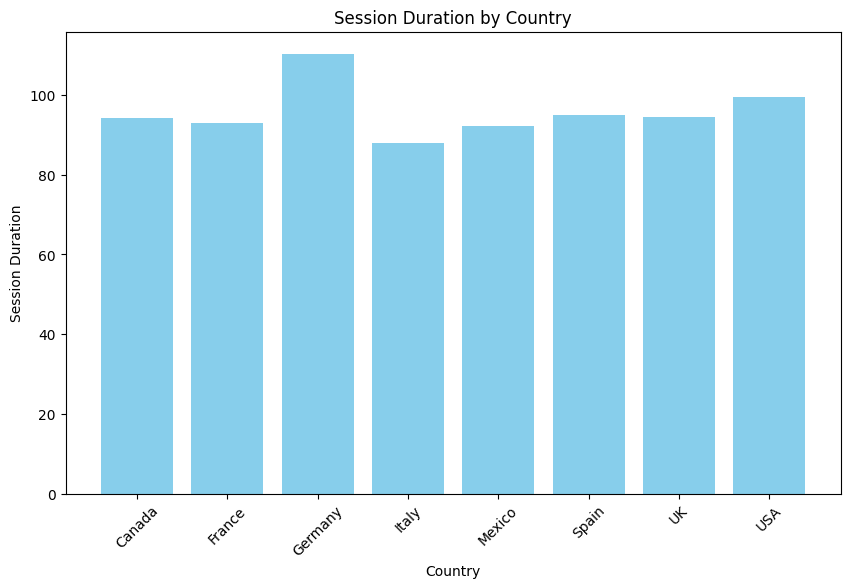

In [14]:
x = country_session_duration.index
y = country_session_duration.values
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Session Duration')
plt.title('Session Duration by Country')
plt.xticks(rotation=45)
plt.show()

### Cada barra representa la duración promedio de sesión en cada país. Vemos que Alemania tiene la mayor duración de sesión, superando ligeramente los 100 minutos, mientras que Italia tiene la menor duración, cerca de los 88 minutos.

Text(0, 0.5, 'Frecuencia')

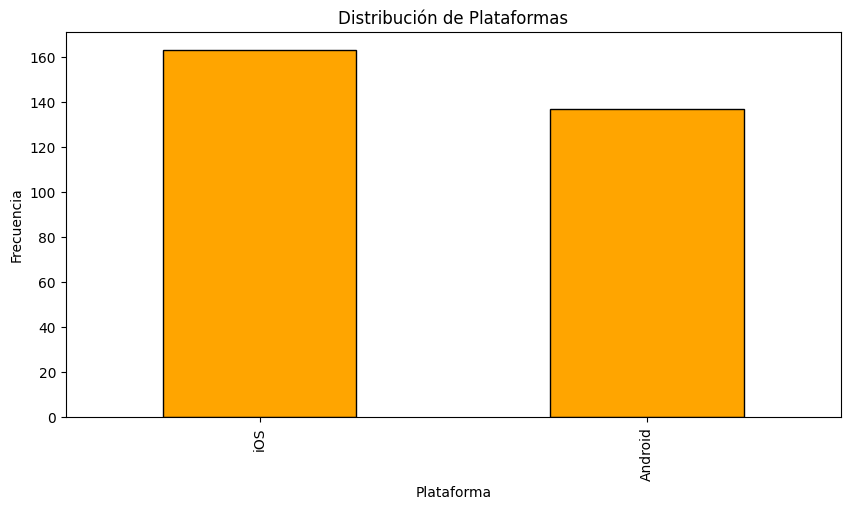

In [15]:
# Gráfico de barras para platform
plt.figure(figsize=(10, 5))
data['platform'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribución de Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Frecuencia')


### Aqui visualizamos la distribucion de las plataformas

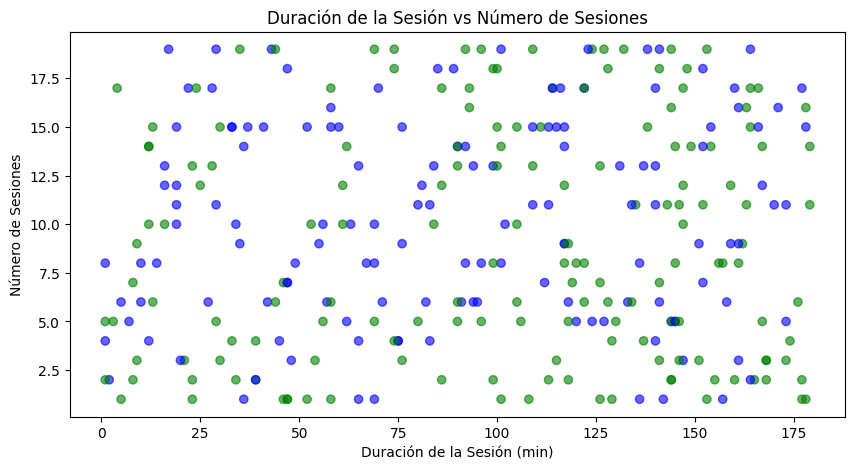

In [16]:
# Scatter plot para session_duration vs. number_of_sessions
plt.figure(figsize=(10, 5))
colors = {'Android': 'blue', 'iOS': 'green'}
plt.scatter(data['session_duration'], data['number_of_sessions'], 
            c=data['platform'].apply(lambda x: colors[x]), alpha=0.6)
plt.title('Duración de la Sesión vs Número de Sesiones')
plt.xlabel('Duración de la Sesión (min)')
plt.ylabel('Número de Sesiones')
plt.show()


### Muestra la relación entre la duración de las sesiones y el número de sesiones, diferenciando por plataforma.